# serial-comm: comunicación y registro de datos por puerto serial
Autor: Claudio Morales D.<br>
https://github.com/cmoralesd/serial-comm <br>
Otoño 2023<br>
<br>
Código base para establecer comunicación por puerto serial entre un dispositivo Arduino (o similar) y un script de Python, utilizando la librería **pyserial**, controlar entradas y salidas del módulo Arduino mediante valores numéricos intercambiados en formato de texto, registrar datos en un archivo CSV, procesar los datos utilizando las herramientas básicas de la librería **pandas** y obtener gráficos de los datos registrados utilizando **matplotlib.pyplot**.

Para comprender las características generales de la comunicación serial, consulte: https://hetpro-store.com/TUTORIALES/puerto-serial/

Los archivos para programación del módulo Arduino se encuentran en https://github.com/cmoralesd/serial-comm


In [2]:
# librerías requeridas
import serial  # librería pyserial, para comunicación con los puertos serial < pip install pyserial >
import time    # para el manejo de eventos de tiempo, nativa de Python
import pandas as pd  # para el manejo de archivos de datos < pip install pandas >
import matplotlib.pyplot as plt # para realizar gráficos < pip install matplotlib >


# funciones para enviar y recibir mensajes en formato de texto, codificado en UTF-8
# los mensajes utilizan como terminador un caracter de final de línea '\n'
def encode_send(ser, texto):
    enc = f'{texto}\n'.encode('UTF-8')
    ser.write(enc)

def decode_response(ser):
    message_from_serial = ser.readline()
    res = message_from_serial[:-1].decode()
    return res


### 1. Código base en esquema request-response

El esquema de comunicación utilizado es **maestro-esclavo** (master-slave) en modo **request-response** (requerimiento-respuesta): sólo un dispositivo puede iniciar la comunicación enviando un requerimiento y el otro dispositivo responde. 

En este caso, el script de Python siempre inicia la comunicación, con un mensaje de texto que contiene dos valores enteros separados por una coma (,). El dispositivo Arduino recibe el mensaje, lo procesa, y envía una respuesta.

El código utilizado en Arduino es: **serial-comm.ino**

In [4]:
# Esquema básico para request-response
# El código utilizado en Arduino es: serial-comm.ino

# 1. Inicializa el puerto de comunicación y espera a que esté listo
serialport = serial.Serial('COM7', 9600)
time.sleep(0.1)   # tiempo de espera recomendado: 100 ms

# 2. Preparamos el mensaje a ser transmitido
val_0 = 123
val_1 = 456
message_to_serial = str(val_0) + ',' + str(val_1)

# 3. Enviamos al puerto y esperamos la respuesta
encode_send(serialport, message_to_serial)
message_from_serial = decode_response(serialport)

# 4. Procesamos la respuesta
print(f'enviado: {message_to_serial}')
print(f'recibido: {message_from_serial}')

# 5. Cierra el puerto serial
serialport.close()
print('el puerto se ha cerrado correctamente')


enviado: 123,456
recibido: Arduino OK
el puerto se ha cerrado correctamente


### 2. Enviando mensajes en forma cíclica

El código utilizado en Arduino es: **serial-comm.ino**

In [7]:
# Esquema básico para comunicarse por puerto serial en forma cíclica
# El código utilizado en Arduino es: serial-comm.ino

# inicializa el puerto de comunicación y espera a que esté listo
serialport = serial.Serial('COM7', 9600)
time.sleep(0.1)   # tiempo de espera recomendado: 100 ms

time_start = time.perf_counter()
time_elpasede = time.perf_counter() - time_start
time_stop = 5.  #en segundos


# inicia el ciclo de intercambio de datos
while time_elpasede < time_stop:
    # Preparamos el mensaje a ser transmitido
    val_0 = 0
    val_1 = 0
    message_to_serial = str(val_0) + ',' + str(val_1)

    # enviamos al puerto y esperamos la respuesta
    encode_send(serialport, message_to_serial)
    message_from_serial = decode_response(serialport)

    # procesamos la respuesta
    print(f'enviado: {message_to_serial}')
    print(f'recibido: {message_from_serial}')
     
    #actualizar la medicion de tiempo 
    time_elpasede = time.perf_counter() - time_start
    print (f'tiempo:{time_elpasede}')



# cierra el puerto serial
serialport.close()
print('el puerto se ha cerrado correctamente')

enviado: 0,0
recibido: Arduino OK
tiempo:0.5571973999904003
enviado: 0,0
recibido: 427;390
tiempo:0.5965515999996569
enviado: 0,0
recibido: 401;392
tiempo:0.6349436000164133
enviado: 0,0
recibido: 392;387
tiempo:0.673229000007268
enviado: 0,0
recibido: 385;382
tiempo:0.7119237000006251
enviado: 0,0
recibido: 378;376
tiempo:0.7504043999942951
enviado: 0,0
recibido: 372;370
tiempo:0.7899089000129607
enviado: 0,0
recibido: 367;364
tiempo:0.8292288999946322
enviado: 0,0
recibido: 361;359
tiempo:0.8675949000171386
enviado: 0,0
recibido: 356;354
tiempo:0.9059575000137556
enviado: 0,0
recibido: 351;349
tiempo:0.9443636999931186
enviado: 0,0
recibido: 345;343
tiempo:0.9834345999988727
enviado: 0,0
recibido: 340;338
tiempo:1.0221373999956995
enviado: 0,0
recibido: 335;333
tiempo:1.0611048999999184
enviado: 0,0
recibido: 330;328
tiempo:1.0997120999963954
enviado: 0,0
recibido: 325;323
tiempo:1.1380167000170331
enviado: 0,0
recibido: 319;317
tiempo:1.176392900000792
enviado: 0,0
recibido: 315;313

### 2. Controlando pines I/O en el dispositivo Arduino

El código utilizado en Arduino es: **serial-control.ino**

In [3]:
# Esquema básico para control de pines I/O en modo request-response
# El código utilizado en Arduino es: serial-comm.ino

# 1. Inicializa el puerto de comunicación y espera a que esté listo
serialport = serial.Serial('COM7', 9600)
time.sleep(0.1)   # tiempo de espera recomendado: 100 ms

# 2. Preparamos el mensaje a ser transmitido
led_verde = 5 # 0 = apagado, otro valor = encendido
led_rojo=  128  # nivel PWM entre 0 y 255
message_to_serial = str(led_verde) + ',' + str(led_rojo)

# 3. Enviamos al puerto y esperamos la respuesta
encode_send(serialport, message_to_serial)
message_from_serial = decode_response(serialport)

encode_send(serialport, message_to_serial)
message_from_serial = decode_response(serialport)
# 4. Procesamos la respuesta
print(f'enviado: {message_to_serial}')

data = message_from_serial.split(';')
val_x = int(data[0])
val_y = int(data[1])
print(f'val_x = {val_x}')
print(f'val_y = {val_y}')

# 5. Cierra el puerto serial
serialport.close()
print('el puerto se ha cerrado correctamente')

enviado: 5,128
val_x = 0
val_y = 985
el puerto se ha cerrado correctamente


### 4. Registrando datos recibidos desde el puerto serial

El código utilizado en Arduino es: **serial-control.ino**

In [4]:
# Registro de transacciones vía puerto serial
# El código utilizado en Arduino es: serial-comm.ino

# 1. Inicializa el puerto de comunicaciones
serialport = serial.Serial('COM7', 9600)
time.sleep(0.1)   # tiempo de espera recomendado: 100 ms

# 2. Inicializa el archivo de registro de datos
filename = 'dataset-' + time.strftime('%d-%m-%y-%H%M%S') + '.csv'
with open(filename,'w') as file:
    file.write('tiempo,led_verde, led_rojo, val_x,val_y\n')


# 3.Registra las transacciones durante un periodo de tiempo especificado
time_start = time.perf_counter()
time_elpasede = time.perf_counter() - time_start
time_stop = 5.  #en segundos

while time_elpasede < time_stop:
    led_verde = 1 # 0 = apagado, otro valor = encendido
    led_rojo=  time_elpasede/time_stop * 255  # nivel PWM entre 0 y 255
    message_to_serial = str(led_verde) + ',' + str(led_rojo)
    # Enviamos al puerto y esperamos la respuesta
    encode_send(serialport, message_to_serial)
    message_from_serial = decode_response(serialport)

    encode_send(serialport, message_to_serial)
    message_from_serial = decode_response(serialport)

    # procesamos el mensaje recibido
    data = message_from_serial.split(';')
    val_x = int(data[0])
    val_y = int(data[1])

    print(f'enviado:{message_to_serial}')
    print(f'enviado:{message_from_serial}')

    with open(filename, 'a') as file:
        file.write(str(time_elpasede) + ',' + str(led_verde) + ',' + str(led_rojo) + ',' + str(val_x) + ',' + str(val_y) + '\n')

    time_elpasede = time.perf_counter() - time_start

# 4.Cierra el puerto de comunicaciones

serialport.close()
print('el puerto se ha cerrado correctamente')


enviado:1,0.0025142998492810875
enviado:506;522
enviado:1,31.71412049952778
enviado:506;522
enviado:1,37.39234830031637
enviado:0;949
enviado:1,43.03593180002645
enviado:507;522
enviado:1,48.685492499236716
enviado:591;0
enviado:1,54.4189635006187
enviado:0;748
enviado:1,59.98155899962876
enviado:506;589
enviado:1,65.67485729939654
enviado:506;0
enviado:1,71.32938539932366
enviado:0;1023
enviado:1,77.01223889971152
enviado:560;1023
enviado:1,82.80348780020722
enviado:783;266
enviado:1,88.48410239987425
enviado:277;521
enviado:1,94.2166401000868
enviado:0;1023
enviado:1,99.69889530036016
enviado:779;555
enviado:1,105.42018749954877
enviado:725;0
enviado:1,111.10238309937995
enviado:321;557
enviado:1,116.81751450063894
enviado:0;1023
enviado:1,122.51170529978117
enviado:659;523
enviado:1,128.38706339951023
enviado:702;0
enviado:1,134.0335539005755
enviado:0;1023
enviado:1,139.6804064999451
enviado:113;1023
enviado:1,145.4198597993818
enviado:958;523
enviado:1,151.14743520040065
enviado:6

In [5]:
df = pd.read_csv(filename)
df

,tiempo,led_verde,led_rojo,val_x,val_y
0,0.000049,1,0.002514,506,522
1,0.621845,1,31.714120,506,522
2,0.733183,1,37.392348,0,949
3,0.843842,1,43.035932,507,522
4,0.954617,1,48.685492,591,0
5,1.067039,1,54.418964,0,748
6,1.176109,1,59.981559,506,589
7,1.287742,1,65.674857,506,0
8,1.398615,1,71.329385,0,1023
9,1.510044,1,77.012239,560,1023


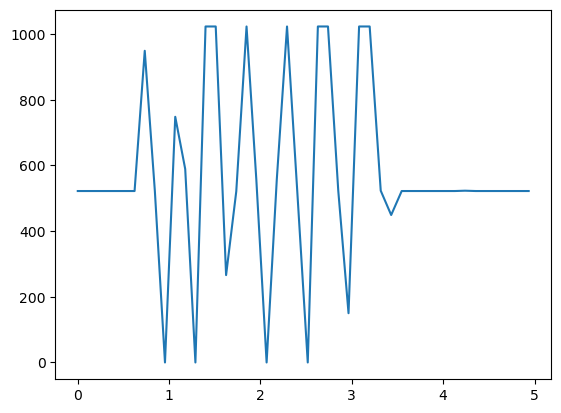

In [6]:
x = df['tiempo'].tolist()
y = df['val_y'].tolist()

ax = plt.figure().add_subplot()
ax.plot(x , y)
plt.show()